# Supervised Learning -Linear Regression

Problem Statement- Predicting the score based upon hours

Linear Regression is the supervised learning method which is used for prediction and loss function used are mean square error
i.e sum(y-y_pred)2 where y=mx+c. m and c are optimized using gradient descent

# Importing Libraries and Data Collection

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


data=pd.read_csv('http://bit.ly/w-data')
print(data.describe())
#data successfully loaded

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


#Two features with count 25
       Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

# Data Information

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


#both the feature contains non-null numbers where the data is balanced data. The Hours feature in float where as Scores feature is in int 

# Scatter plot of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8A51B4C8>,
      dtype=object)

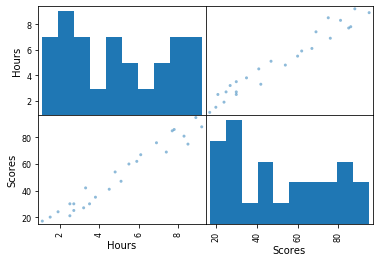

In [11]:
pd.plotting.scatter_matrix(data)

#from scatter plot it is clearly seen that the relationship between data is positively linear

# Splitting Of Data And Cross Validation using cross_val_score

In [12]:

#x=data.loc[:,'Hours']
#y=data.loc[:,'Scores']

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print(y_train.ndim)
print(x_train.ndim)
lr=LinearRegression()

lr_cross=cross_val_score(lr,x_train,y_train,cv=2)
print(lr_cross)


1
2
[0.95115647 0.91860845]


# Predicting the score Using cross_val_predict on Training Data

In [13]:
y_train_pred=cross_val_predict(lr,x_train,y_train,cv=2)
print(y_train_pred)

[84.33339399 93.40007799 46.05183933 19.85919667 70.22966333 38.999974
 32.955518   75.26671    33.96292734 15.82955934 60.39174312 48.46513761
 54.88715596 27.36422018 82.41009174 29.19908257 29.19908257 58.55688073
 51.21743119 75.0706422 ]


# Predicting the score Using cross_val_predict on Testing Data

In [14]:
y_test_pred=cross_val_predict(lr,x_test,y_test,cv=2)
print(y_test_pred)

[17.96296296 81.75925926  1.11111111 41.22164398 97.23205231]


# Calculating Mean Square error and R2

In [15]:
#calculating mean square error and r2
print('mean square error ',mean_squared_error(y_train,y_train_pred))
print('r2 ',r2_score(y_train,y_train_pred))

mean square error  31.566431385626107
r2  0.9377937000662608


#as the r2 is closely to the 1 which means the model is predicting the value which is very close to actual value

# Testing On a Sample Point

In [16]:
##### testing on given sample point
lr.fit(x_train,y_train)
sample_hour = [[9.25]]
sample_pred = lr.predict(sample_hour)
print("No of Hours = {}".format(sample_hour))
print("Predicted Score = {}".format(sample_pred))

No of Hours = [[9.25]]
Predicted Score = [91.14116054]


# Regression Line

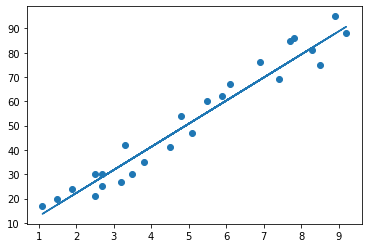

In [19]:
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()